In [1]:
from iterator import SmartIterator
from utils.visualization_utils import get_att_map, objdict, get_dict
from keras.models import load_model
from ssn import ReferringRelationshipsModel

import numpy as np
import os
from PIL import Image
import json
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# cmap = "hot"
cmap = "coolwarm"

In [3]:
annotations_test = json.load(open("data/VRD/annotations_test.json"))
test_data_dir = '/data/ranjaykrishna/ReferringRelationships/data/dataset-vrd/test'
img_dir = '/data/chami/VRD/sg_dataset/sg_test_images/'
vocab_dir = os.path.join('data/VRD')
predicate_dict, obj_subj_dict = get_dict(vocab_dir)

## PREDICATE ONLY

In [4]:
model_checkpoint = "/data/chami/ReferringRelationships/models/VRD/10_19_2017/1/model37-0.51.h5"
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
relationships_model = ReferringRelationshipsModel(params)
model = relationships_model.build_model()
model.load_weights(model_checkpoint)
conv_filters = model.get_layer("conv2d_2").get_weights()[0].reshape((70, 5, 5))

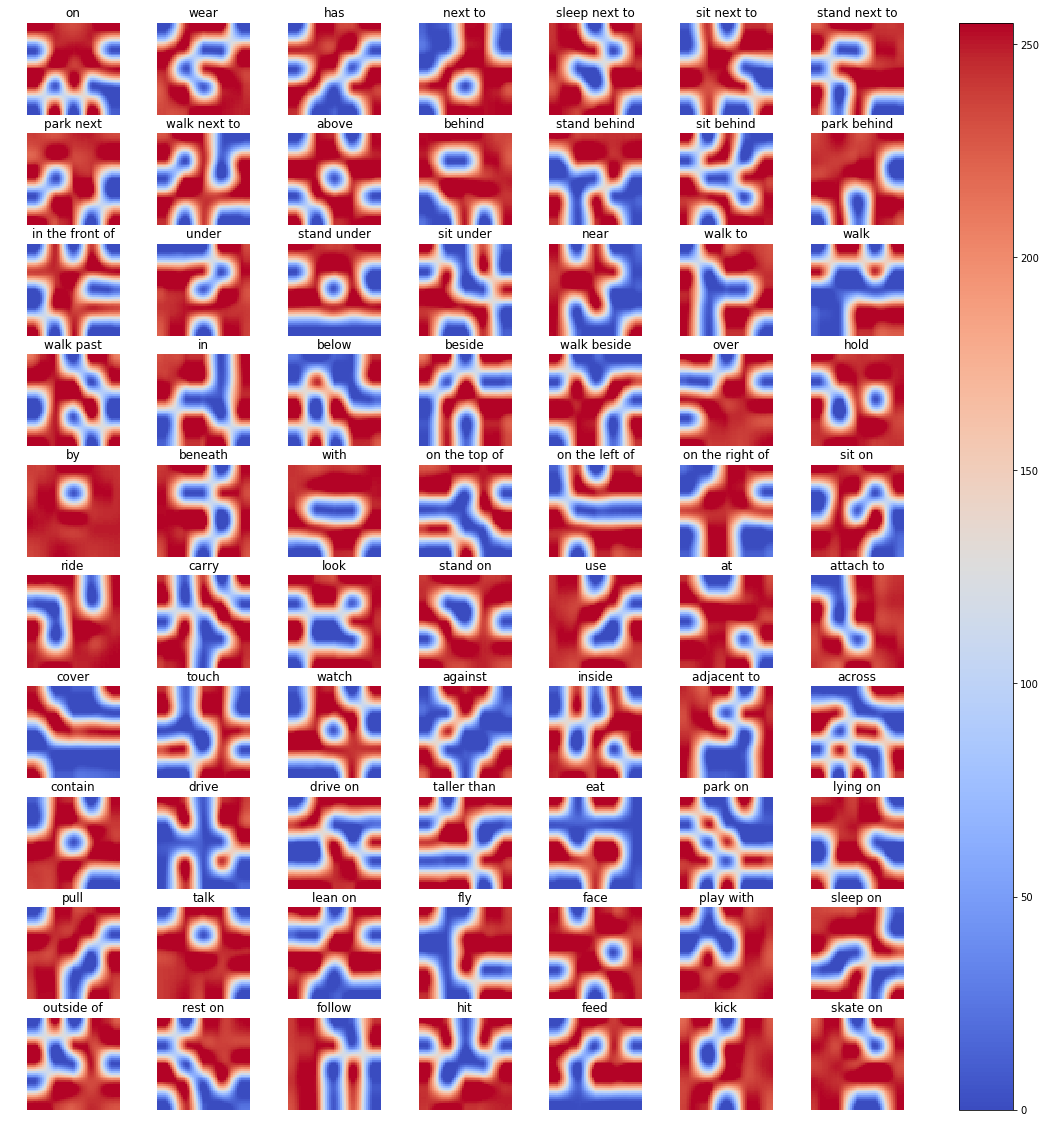

In [10]:
resample = Image.ANTIALIAS
fig, axs = plt.subplots(nrows=10, ncols=7, figsize=(20,20))
idx = 0
for i in range(10):
    for j in range(7):
        ax = axs[i,j]
        im = Image.fromarray(np.uint8(conv_filters[idx]*255))
        im = np.array(im.resize((50, 50), resample))
        plot = ax.imshow(im, vmin=0, vmax=255, cmap=cmap)
        ax.set_title(predicate_dict[idx])
        ax.axis("off")
        idx += 1
fig.colorbar(plot, ax=axs.ravel().tolist())

## PREDICATE AND INVERSE PREDICATE

In [4]:
model_checkpoint = "/data/chami/ReferringRelationships/models/VRD/10_19_2017/4/model31-0.49.h5"

In [5]:
params = objdict(json.load(open(os.path.join(os.path.dirname(model_checkpoint), "args.json"), "r")))
relationships_model = ReferringRelationshipsModel(params)

In [6]:
model = relationships_model.build_model()

In [7]:
model.load_weights(model_checkpoint)

In [8]:
conv_filters = model.get_layer("conv2d_2").get_weights()[0].reshape((70, 5, 5))
inv_conv_filters = model.get_layer("conv2d_5").get_weights()[0].reshape((70, 5, 5))

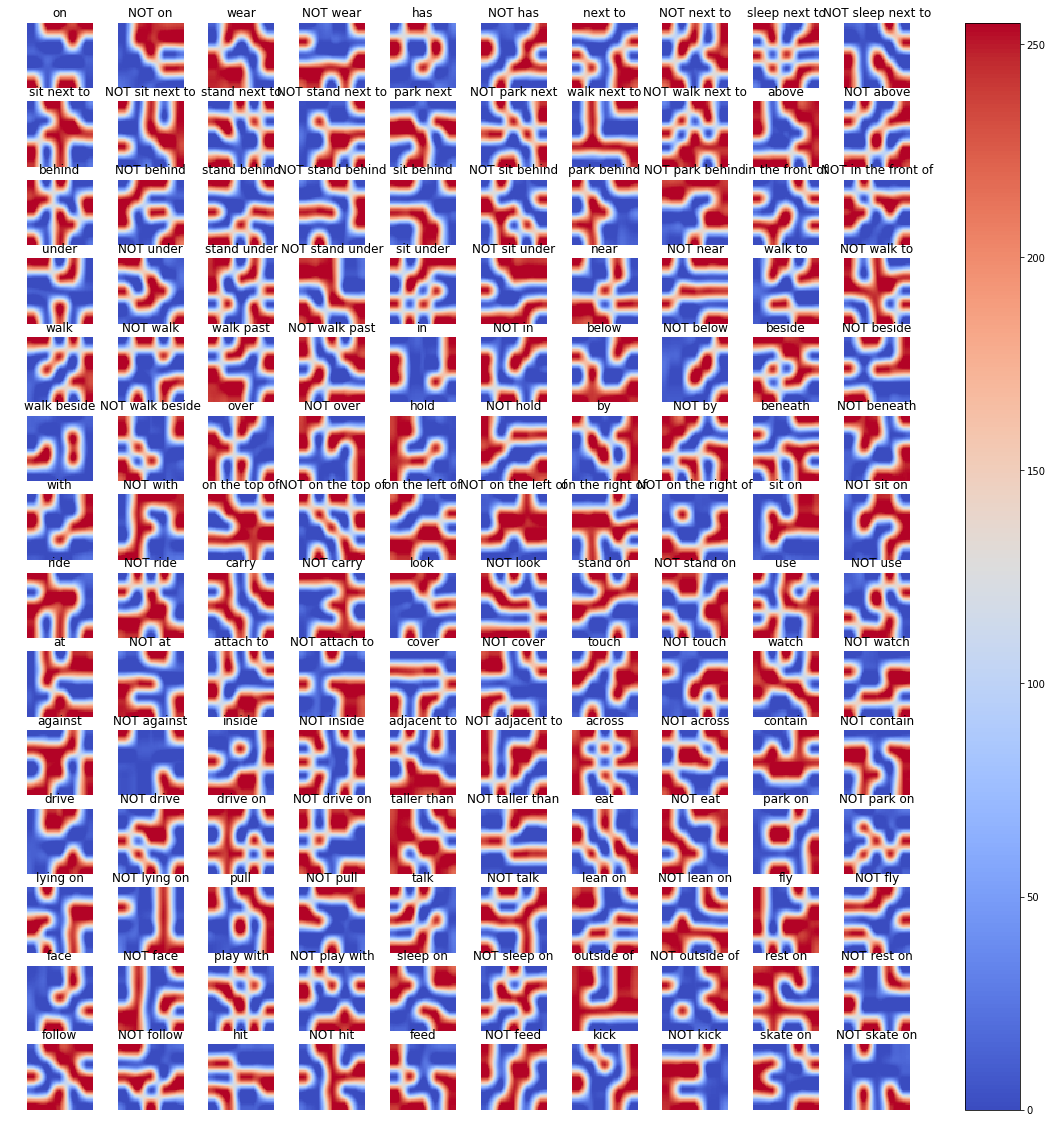

In [12]:
resample = Image.ANTIALIAS
fig, axs = plt.subplots(nrows=14, ncols=10, figsize=(20,20))
idx = 0
for i in range(14):
    for j in range(5):
        ax = axs[i,2*j]
        im = Image.fromarray(np.uint8(conv_filters[idx]*255))
        im = np.array(im.resize((50, 50), resample))
        plot = ax.imshow(im, vmin=0, vmax=255, cmap=cmap)
        ax.set_title(predicate_dict[idx])
        ax.axis("off")
        ax = axs[i,2*j+1]
        im = Image.fromarray(np.uint8(inv_conv_filters[idx]*255))
        im = np.array(im.resize((50, 50), resample))
        plot = ax.imshow(im, vmin=0, vmax=255, cmap=cmap)
        ax.set_title("NOT {}".format(predicate_dict[idx]))
        ax.axis("off")
        idx += 1
fig.colorbar(plot, ax=axs.ravel().tolist())